In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

# Load Meanbrain

In [7]:
file = os.path.join(root_directory,
                    '20191130_meanbrain',
                    'meanbrain_syn_round2.nii')

meanbrain = bbb.load_numpy_brain(file)

# Reset master spacing
meanbrain = ants.from_numpy(meanbrain)
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
meanbrain.set_spacing(bbb.get_resolution(anatomy_xml))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 407.47 ms


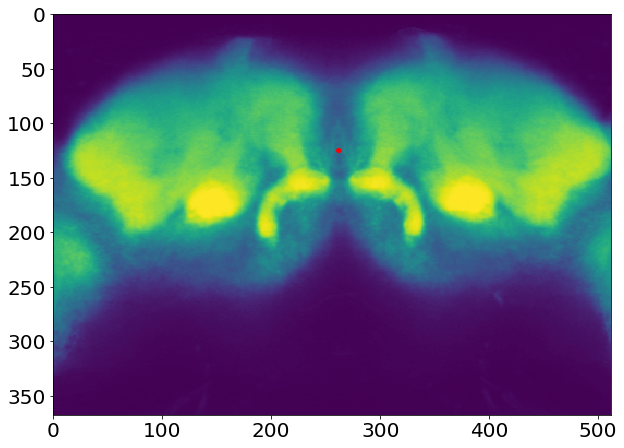

In [21]:
plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(meanbrain.numpy()[:,:,90].T)
circle = plt.Circle((262, 125), 2, color='r')
ax.add_artist(circle)

# Load anatomy

In [9]:
file = os.path.join(root_directory, 'fly_19', 'anat_0', 'anatomy.nii')
anatomy = bbb.load_numpy_brain(file)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 464.51 ms


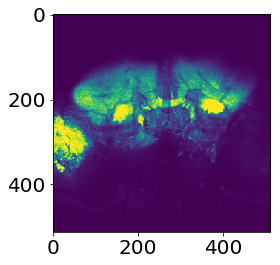

In [12]:
plt.imshow(anatomy[:,:,40].T)

In [13]:
anatomy_xml = os.path.join(root_directory, 'fly_19', 'anat_0', 'anatomy.xml')
anatomy = ants.from_numpy(anatomy)
anatomy.set_spacing(bbb.get_resolution(anatomy_xml))

# Warp

In [ ]:
t0 = time.time()
slave2master = ants.registration(meanbrain,
                                 anatomy,
                                 type_of_transform='TVMSQC')
print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))

In [ ]:
3

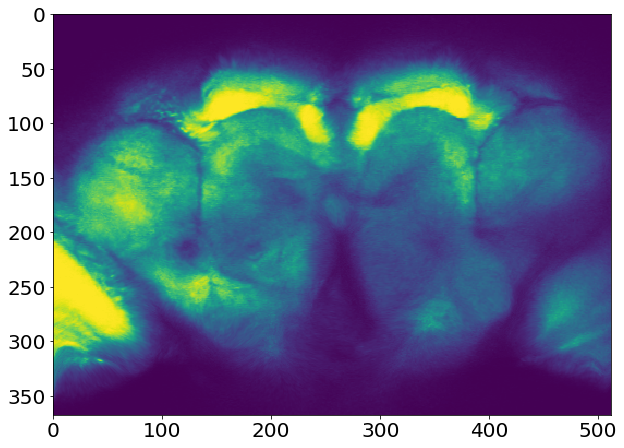

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(slave2master['warpedmovout'][:,:,150].T)

In [24]:
ants.registration?

In [ ]:
master = meanbrain
slave = anatomy

grad_steps = 0.2
flow_sigma = 10
total_sigma = 0
aff_sampling = 32
syn_sampling = 256
verbose = True

t0 = time.time()
slave2master = ants.registration(master,
                                 slave,
                                 type_of_transform='SyNAggro',
                                 syn_sampling=syn_sampling,
                                 flow_sigma=flow_sigma,
                                 total_sigma=total_sigma,
                                 grad_steps=grad_steps)
print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))

In [15]:
ants.registration?